# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



# Database

In [4]:
df = pd.read_csv('/.../events_data.csv')
df.head()

,marketplace_events_domain,marketplace_events_page_type,marketplace_events_session_id,added_to_cart,event_time,marketplace_events_user_id,event_id,part_type,part_price
0,brand.name,Search results,99ce30f9-e95c-4e80-9860-d59d2c005e76,NaN,2024-09-26 15:24:09,a672268e-bac1-42c8-bd1c-069cbbaf3211,517357b9-8346-45c7-be8d-7953ff317b90,NaN,NaN
1,brand.name,Search results,99ce30f9-e95c-4e80-9860-d59d2c005e76,NaN,2024-09-26 15:24:10,a672268e-bac1-42c8-bd1c-069cbbaf3211,b4457875-a63d-417f-a6da-f8e5e11511b8,NaN,NaN
2,brand.name,Search results,99ce30f9-e95c-4e80-9860-d59d2c005e76,NaN,2024-09-26 15:24:16,a672268e-bac1-42c8-bd1c-069cbbaf3211,80bd01c3-1218-4093-9dde-1153e91b244e,NaN,NaN
3,brand.name,Search results,99ce30f9-e95c-4e80-9860-d59d2c005e76,NaN,2024-09-26 15:24:31,a672268e-bac1-42c8-bd1c-069cbbaf3211,91a7b146-2892-430a-b95a-a77a6bb8f95c,NaN,NaN
4,brand.name,Product page,99ce87eb-fb38-4d97-a773-20c1b434cc4e,NaN,2024-09-17 11:25:56,4f9ab9e0-4375-4221-b0b3-c03ad83249b5,740c3316-dda9-46fb-8b3c-800d307ea553,NaN,NaN


# Database analysis

## Events page type analysis

marketplace_events_page_type
Checkout success      5852
Homepage             74531
Parts list          122587
Product page        396723
Search results      311054
Name: count, dtype: int64


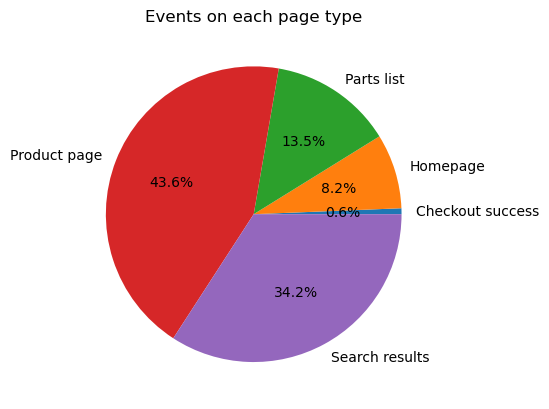

In [5]:
events_pages = df.groupby('marketplace_events_page_type')['marketplace_events_page_type'].value_counts()
print(events_pages)
plt.pie(events_pages, labels=['Checkout success','Homepage', 'Parts list', 'Product page', 'Search results'], autopct='%0.1f%%')
plt.title('Events on each page type')
plt.savefig('Events_happened_on_each_page_type.png')

## General

### Whole df database statistics

In [6]:
print("The length of the database: " + str(len(df)))
print("# of different marketplace_events_domains - " + str(len(df['marketplace_events_domain'].unique())) + ": " + str(df['marketplace_events_domain'].unique()))
print("# of different marketplace_events_page_types - " + str(len(df['marketplace_events_page_type'].unique())) + ": " + str(df['marketplace_events_page_type'].unique()))
print("# of different marketplace_events_session_ids - " + str(len(df['marketplace_events_session_id'].unique())))
print("# of different options for added_to_cart - " + str(len(df['added_to_cart'].unique())) + ": " + str(df['added_to_cart'].unique()))
print("# of different event_times - " + str(len(df['event_time'].unique())))
print("# of different marketplace_events_user_ids - " + str(len(df['marketplace_events_user_id'].unique())))
print("# of different event_ids - " + str(len(df['event_id'].unique())))
print("# of different part_types - " + str(len(df['part_type'].unique())) + ": " + str(df['part_type'].unique()))
print("# of different part_prices - " + str(len(df['part_price'].unique())))


The length of the database: 910747
# of different marketplace_events_domains - 1: ['brand.name']
# of different marketplace_events_page_types - 5: ['Search results' 'Product page' 'Parts list' 'Homepage'
 'Checkout success']
# of different marketplace_events_session_ids - 132229
# of different options for added_to_cart - 2: [nan 'Add to cart']
# of different event_times - 499172
# of different marketplace_events_user_ids - 97831
# of different event_ids - 714216
# of different part_types - 20: [nan 'Door' 'Engine' 'Devices/switches/electronic system' 'Front axle'
 'Glass' 'Cabin/interior' 'Exterior front body parts'
 'Fuel mixture system' 'Lighting system' 'Exterior rear body parts'
 'Brake system' 'Gearbox/clutch/transmission' 'Wheels/tires/caps'
 'Rear axle' 'Body/body parts/hook'
 'Headlight/headlamp washing/cleaning system' 'Other parts'
 'Air conditioning-heating system/radiators' 'Gas exhaust system']
# of different part_prices - 1489


### Information about Events by their event_id

In [7]:
events = df.groupby('event_id')['event_id'].value_counts()
#print(events.head())
filtered_events = events[events > 1].sort_values(ascending=False)
print(len(df['event_id']))
print(len(events))
print(len(filtered_events))
print(filtered_events.head(10))

bandymas = df['event_id'].value_counts().sort_values(ascending=False)
print(bandymas.head())
print(len(bandymas))

910747
714216
96780
event_id
95c390c5-e4f3-4f19-9b6b-a62a6d24c396    4044
6463f634-ebc9-41ea-8453-0c24720584f9    4042
fee05e9d-9842-462f-a83c-02d3e1c947b7    4018
6b8ee426-beca-4d97-90e3-1d20a523b718    4017
8ccd736d-3ea9-46b1-a5bc-6f4fb653ccab    1492
14c5f74b-4360-4fcc-928c-745879d37335    1481
c74074f8-bcb3-4490-8ad2-76d4755dde15    1465
d3d5e223-07b2-4e2b-9d7b-169756f3362e    1461
f4928207-82d7-4409-ada3-04406c0eb325    1460
7f580f62-9c80-4762-97fd-2e59dc1491c0    1450
Name: count, dtype: int64
event_id
95c390c5-e4f3-4f19-9b6b-a62a6d24c396    4044
6463f634-ebc9-41ea-8453-0c24720584f9    4042
fee05e9d-9842-462f-a83c-02d3e1c947b7    4018
6b8ee426-beca-4d97-90e3-1d20a523b718    4017
8ccd736d-3ea9-46b1-a5bc-6f4fb653ccab    1492
Name: count, dtype: int64
714216


## Categories, Revenue

#### Checking if there are people who reached Checkout success page, but there are no part_type value next to any row with their id

In [8]:
print(df[(df.marketplace_events_user_id =='172481b6-2c4d-4d9d-8a09-e6b6bad65e83')&(df.added_to_cart.notna())])
print(df[(df.marketplace_events_user_id =='172481b6-2c4d-4d9d-8a09-e6b6bad65e83')&(df.part_type.notna())])

       marketplace_events_domain marketplace_events_page_type  \
495944                  brand.name               Search results   

               marketplace_events_session_id added_to_cart  \
495944  2434a692-9086-4c50-aa92-9ede842eab19   Add to cart   

                 event_time            marketplace_events_user_id  \
495944  2024-09-23 20:27:24  172481b6-2c4d-4d9d-8a09-e6b6bad65e83   

                                    event_id part_type  part_price  
495944  c7aae9ca-e758-444b-98c4-593d11428c77       NaN         NaN  
Empty DataFrame
Columns: [marketplace_events_domain, marketplace_events_page_type, marketplace_events_session_id, added_to_cart, event_time, marketplace_events_user_id, event_id, part_type, part_price]
Index: []


### For stock planning - creating database when user not only added to cart, but also bought something and which day it happened

In [9]:
#Saving user_id and event_time from all the rows where reached page_type was 'Checkout success':
checkout_success_users_for_stock = df.loc[df['marketplace_events_page_type'] == 'Checkout success', ['marketplace_events_user_id', 'event_time']]
checkout_success_users_for_stock = checkout_success_users_for_stock.drop_duplicates(subset=['marketplace_events_user_id'], keep='first') 

#Picking up all the rows' and columns' information from the original dataframe df:
relevant_df_rows_for_stock = df[df['marketplace_events_user_id'].isin(checkout_success_users_for_stock['marketplace_events_user_id'])]
relevant_df_rows_for_stock = relevant_df_rows_for_stock.drop_duplicates(subset=['marketplace_events_user_id', 'part_type'])
grouped = relevant_df_rows_for_stock.groupby('marketplace_events_user_id')['part_type'].agg(list)#.unique() might also be used as no one 
                                                                                       # added the same type product twice:) - checked.
#Making sure I'll have a new clean dataframe to work with:                                                                                       
new_df_sold_event_time = grouped.reset_index()
new_df_sold_event_time['part_type'] = new_df_sold_event_time['part_type'].apply(lambda x: [item for item in x if not pd.isna(item)])

#Attaching to the new dataframe event_time when the purchase - 'Checkout success' happened:
new_df_sold_event_time = new_df_sold_event_time.merge(checkout_success_users_for_stock, on='marketplace_events_user_id', how='left')

#Separating part_type generated lists into separate rows for each item:  
stock_planning_df = new_df_sold_event_time.explode('part_type', ignore_index=True)

#Separating event_time to event_date & event_time:
stock_planning_df['event_date_only'] = pd.to_datetime(stock_planning_df['event_time']).dt.date
stock_planning_df['event_time_only'] = pd.to_datetime(stock_planning_df['event_time']).dt.time
stock_planning_df = stock_planning_df.drop(columns=['event_time'])

print(stock_planning_df.head(10))
print(len(stock_planning_df))
print(len(stock_planning_df[stock_planning_df['part_type'].notna()]))

#new_df_sold_event_time.rename(columns={'part_type': 'part_types'}, inplace=True)
#new_df_sold['part_types'] = new_df_sold['part_types'].apply(list)

             marketplace_events_user_id                    part_type  \
0  16488e6c-265c-4d5f-a620-d93c56d72573          Fuel mixture system   
1  16488e6c-265c-4d5f-a620-d93c56d72573           Gas exhaust system   
2  168d117d-eb06-4d4a-8152-beb59bdf1b09  Gearbox/clutch/transmission   
3  16aeadd9-fad0-484b-a736-0b5e4899a4e5          Fuel mixture system   
4  16aeadd9-fad0-484b-a736-0b5e4899a4e5  Gearbox/clutch/transmission   
5  16aeadd9-fad0-484b-a736-0b5e4899a4e5                       Engine   
6  16deda24-44c2-4d3b-94db-47096d004f89           Gas exhaust system   
7  16e4e4a0-ea63-4014-97ae-3e10a4378029                          NaN   
8  16ecb588-d419-4f80-9b30-ad37194a9b01  Gearbox/clutch/transmission   
9  172481b6-2c4d-4d9d-8a09-e6b6bad65e83                          NaN   

  event_date_only event_time_only  
0      2024-09-24        16:49:27  
1      2024-09-24        16:49:27  
2      2024-09-28        17:51:06  
3      2024-09-10        20:19:15  
4      2024-09-10        20

### ??? Trying to evaluate how many different sessions the same unique id had

In [10]:
# Ensure the 'event_time' column is in datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

session_durations = df.groupby(['marketplace_events_user_id', 'marketplace_events_session_id'])['event_time'].agg(
    session_start='min',
    session_end='max'
)
session_durations['session_duration'] = (session_durations['session_end'] - session_durations['session_start']).dt.total_seconds()

session_durations = session_durations.reset_index()

user_session_summary = session_durations.groupby('marketplace_events_user_id').agg(
    total_sessions=('marketplace_events_session_id', 'count'),  # Count of unique sessions per user
    total_duration=('session_duration', 'sum'),                 # Total session duration per user
    avg_duration=('session_duration', 'mean')                   # Average session duration per user
).reset_index()

session_durations = session_durations.sort_values(by='session_duration', ascending=False).reset_index(drop=True)
user_session_summary = user_session_summary.sort_values(by='total_duration', ascending=False).reset_index(drop=True)

print("Detailed Session Durations (each unique session):")
print(session_durations.head())

print("\nUser Session Summary (grouped by user):")
print(user_session_summary.head())


print(df[df['marketplace_events_user_id'] == '82d4ddec-412d-424a-8251-7a33d9acc067'])
user_sessions = session_durations[session_durations['marketplace_events_user_id'] == '82d4ddec-412d-424a-8251-7a33d9acc067']
print(user_sessions)
user_summary = user_session_summary[user_session_summary['marketplace_events_user_id'] == '82d4ddec-412d-424a-8251-7a33d9acc067']
print(user_summary)

Detailed Session Durations (each unique session):
             marketplace_events_user_id         marketplace_events_session_id  \
0  82d4ddec-412d-424a-8251-7a33d9acc067  7b9bd5db-a6ab-4fd4-aeb1-3b1f6249caf6   
1  45982a27-49b5-4a96-bd97-7f76daf180e5  7821fc85-aa92-45c4-8fd8-9241ca2092a8   
2  4f7df5f6-0c56-4a51-9d0c-787c9e96db65  a190c58d-6440-4b5e-addb-a131ea79364a   
3  32caf92a-dd3d-4dae-963e-94e5f6eed477  0b90570a-4b0d-4626-b069-7754c45421b7   
4  1cc81a10-eee8-4c4c-a31f-54961f2d01e9  ef47a4ff-a4fd-4017-ae99-53443556a38e   

        session_start         session_end  session_duration  
0 2024-09-02 16:58:01 2024-09-29 17:55:01         2336220.0  
1 2024-09-03 10:54:40 2024-09-28 17:14:34         2182794.0  
2 2024-09-02 11:34:41 2024-09-27 15:17:42         2173381.0  
3 2024-09-02 15:20:45 2024-09-26 08:50:38         2050193.0  
4 2024-09-02 06:19:36 2024-09-25 19:26:54         2034438.0  

User Session Summary (grouped by user):
             marketplace_events_user_id  total_ses

### Generating the plot for the stocks:

   event_date_only  sold_items
0       2024-09-02          80
1       2024-09-03          64
2       2024-09-04          59
3       2024-09-05          82
4       2024-09-06          77
5       2024-09-07          48
6       2024-09-08          49
7       2024-09-09          68
8       2024-09-10          77
9       2024-09-11          59
10      2024-09-12          70
11      2024-09-13          51
12      2024-09-14          11
13      2024-09-15           1
14      2024-09-16         150
15      2024-09-17          77
16      2024-09-18          48
17      2024-09-19          53
18      2024-09-20          74
19      2024-09-21          38
20      2024-09-22          50
21      2024-09-23          82
22      2024-09-24          81
23      2024-09-25          80
24      2024-09-26          77
25      2024-09-27          63
26      2024-09-28          34
27      2024-09-29          51


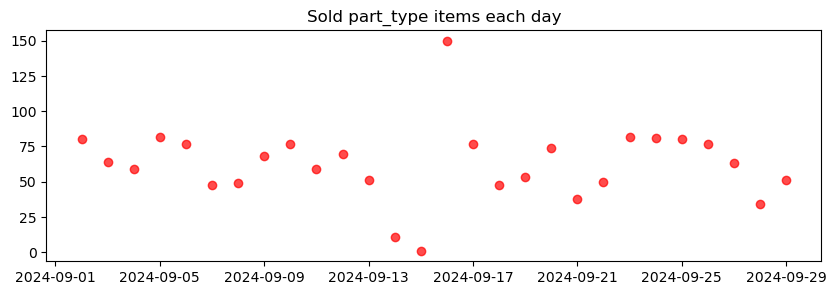

In [11]:
grouped_data = stock_planning_df.groupby('event_date_only')['part_type'].count().reset_index()
grouped_data.rename(columns={'part_type': 'sold_items'}, inplace=True)
print(grouped_data)
plt.figure(figsize=(10, 3))
plt.scatter(grouped_data['event_date_only'], grouped_data['sold_items'], color='red', alpha=0.7)
plt.title('Sold part_type items each day')

plt.savefig('Sold part_type items in September.png')
plt.show()
#print(grouped_data)
#print(grouped_data['sold_items'].sum())

### Best interest expressing categories (added to the cart)

In [12]:
part_categories = df[df['part_type'].notna() ]
added_to_cart = df[df['added_to_cart'].notna()]
purchased_success =  df[df['marketplace_events_page_type'] == 'Checkout success']
purchased_unnique = purchased_success['marketplace_events_user_id'].unique()
print(purchased_success.head())
print("Total of all users who purchased products: " + str(len(purchased_unnique)))
print("Total of all added part_type items to the cart: " + str(len(part_categories)))
print("Total of all cells marked as added to the cart: " + str(len(added_to_cart)))
categories_value_counts = part_categories['part_type'].value_counts()
categories_value_counts_df = categories_value_counts.reset_index()
categories_value_counts_df.columns = ['part_type', 'count']
print(categories_value_counts)
#print(categories_value_counts_df)


#added_to_cart_value_counts = added_to_cart['part_type'].value_counts() <-- same as categories_cvalue_counts
#print(added_to_cart_value_counts) <-- same as categories_cvalue_counts

#print(len(purchased_unnique))
#print(added_to_cart.head())
#print(part_categories.head())
#__________________________
#print('Category added to the cart'+str(len(part_categories[part_categories['part_type'] == 'Door'])))
#print(len(part_categories[part_categories['part_type'] == 'Engine']))
#print(len(part_categories[part_categories['part_type'] == 'Devices/switches/electronic system']))
#print(len(part_categories[part_categories['part_type'] == 'Front axle']))
#print(len(part_categories[part_categories['part_type'] == 'Glass']))
#print(len(part_categories[part_categories['part_type'] == 'Cabin/interior']))
#print(len(part_categories[part_categories['part_type'] == 'Cabin/interior']))
#print(len(part_categories[part_categories['part_type'] == 'Cabin/interior']))
#print(len(part_categories[part_categories['part_type'] == 'Cabin/interior']))
#print(part_categories.head())

     marketplace_events_domain marketplace_events_page_type  \
546                   brand.name             Checkout success   
547                   brand.name             Checkout success   
948                   brand.name             Checkout success   
949                   brand.name             Checkout success   
1160                  brand.name             Checkout success   

             marketplace_events_session_id added_to_cart          event_time  \
546   99f501ff-c54e-42f4-8379-5ffba02ebdc3           NaN 2024-09-06 10:36:16   
547   99f501ff-c54e-42f4-8379-5ffba02ebdc3           NaN 2024-09-06 10:36:16   
948   9a2129c0-8153-4c74-b85e-cff28db3048b           NaN 2024-09-24 11:34:59   
949   9a2129c0-8153-4c74-b85e-cff28db3048b           NaN 2024-09-24 11:34:59   
1160  9a42fa59-b040-4fb7-b6d5-975657ea27a1           NaN 2024-09-24 12:31:59   

                marketplace_events_user_id  \
546   2d22ab4f-4870-4e99-a253-f4b74945ac29   
547   2d22ab4f-4870-4e99-a253-f4b74945

In [13]:
all_added_to_the_cart_products = len(part_categories['marketplace_events_user_id'].unique())
print(all_added_to_the_cart_products)
products_added_as_add_on = len(part_categories) - len(part_categories['marketplace_events_user_id'].unique())
print(products_added_as_add_on)
#Diff = all_sold_products - products_as_add_on
#print(Diff)
#pie = [Diff, products_as_add_on]
#names= ["Sales part as unique products", "Sales part as the Add-ons"]
#plt.pie(pie, labels=names, autopct='%0.1f%%')
#plt.title("Distribution of the bought amount on brand.name")
#plt.savefig('Distribution of the bought amount on brand.name.png')

2257
1384


### Filtering all users who has Checkout success and their product types

In [14]:
checkout_success_users = df.loc[df['marketplace_events_page_type'] == 'Checkout success', 'marketplace_events_user_id'].unique()
relevant_df_rows = df[df['marketplace_events_user_id'].isin(checkout_success_users)]
relevant_df_rows = relevant_df_rows.drop_duplicates(subset=['marketplace_events_user_id', 'part_type'])
grouped = relevant_df_rows.groupby('marketplace_events_user_id')['part_type'].agg(list)#.unique() might also be used as no one 
                                                                                       #added the same type product twice - checked.
new_df_sold = grouped.reset_index()
new_df_sold.rename(columns={'part_type': 'part_types'}, inplace=True)
new_df_sold['part_types'] = new_df_sold['part_types'].apply(list)
new_df_sold['part_types'] = new_df_sold['part_types'].apply(lambda x: [item for item in x if not pd.isna(item)])
print(new_df_sold.head())
#print(len(new_df_sold['marketplace_events_user_id'].unique()))

print(len(checkout_success_users))
# Step 1: Filter for unique user IDs with "Checkout success" in marketplace_events_page_type
# Step 2: Filter the DataFrame for rows belonging to these user IDs
# Step 3: Group by user ID and extract unique product_type for each user
# Step 4: Create a new DataFrame with the linked user IDs and product types
# Step 5: Convert the product types from NumPy array to list for better readability (optional)
#print(df[df.marketplace_events_user_id == '16aeadd9-fad0-484b-a736-0b5e4899a4e5'])

#print(new_df_sold['part_types'].head())
#print(new_df_sold['part_types'].apply(type).unique())

             marketplace_events_user_id  \
0  16488e6c-265c-4d5f-a620-d93c56d72573   
1  168d117d-eb06-4d4a-8152-beb59bdf1b09   
2  16aeadd9-fad0-484b-a736-0b5e4899a4e5   
3  16deda24-44c2-4d3b-94db-47096d004f89   
4  16e4e4a0-ea63-4014-97ae-3e10a4378029   

                                          part_types  
0          [Fuel mixture system, Gas exhaust system]  
1                      [Gearbox/clutch/transmission]  
2  [Fuel mixture system, Gearbox/clutch/transmiss...  
3                               [Gas exhaust system]  
4                                                 []  
1546


### Evaluating the number of all sold product_types and different product_types numbers

Total amount of all sold part_type items: 1754
Number of each unique sold part_type item:
                                     part_type  count
6           Devices/switches/electronic system    348
5                               Cabin/interior    222
12                             Lighting system    145
0                          Fuel mixture system    123
3                                       Engine    117
8                                         Door    114
9                    Exterior front body parts     89
4                                 Brake system     87
2                  Gearbox/clutch/transmission     84
7                                   Front axle     77
1                           Gas exhaust system     70
15   Air conditioning-heating system/radiators     70
16                    Exterior rear body parts     60
14                                   Rear axle     36
18                        Body/body parts/hook     32
10  Headlight/headlamp washing/cleaning system

/var/folders/r3/y6x6b2nx2837gbftb_th9z940000gn/T/ipykernel_83574/3911196249.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sold_item_counts_df['part_type'], rotation=90)


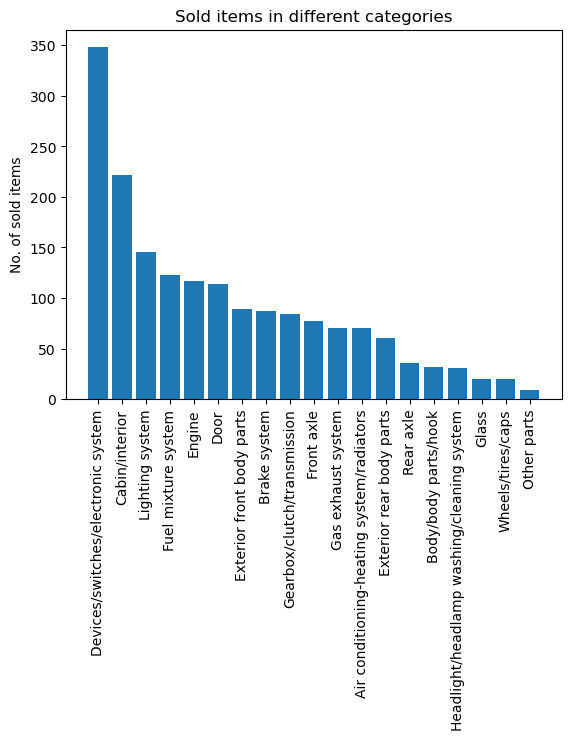

In [15]:
from collections import Counter

all_items = [item for sublist in new_df_sold['part_types'] for item in sublist]
item_counts = Counter(all_items)
total_count = sum(item_counts.values())
#print("Counts of each unique sold item:", item_counts)
print("Total amount of all sold part_type items:", total_count)

sold_item_counts_df = pd.DataFrame.from_dict(item_counts, orient='index', columns=['count']).reset_index()
sold_item_counts_df.rename(columns={'index': 'part_type'}, inplace=True)
sold_item_counts_df = sold_item_counts_df.sort_values(by='count', ascending=False)
item_counts_df = sold_item_counts_df.reset_index(drop=True)
print("Number of each unique sold part_type item:")
print(sold_item_counts_df)

ax = plt.subplot()
ax.bar(sold_item_counts_df['part_type'], sold_item_counts_df['count'])
ax.set_xticklabels(sold_item_counts_df['part_type'], rotation=90)
plt.title('Sold items in different categories')
plt.ylabel('No. of sold items')
plt.show

plt.savefig('Sold items in diff cat.png')


### ??? Vizualization for expressed interest and sold different par_type items. <--> JEIGU viskas susivelia vėliau nuo to, ką pateikei - IŠTRINK šitą 

<class 'pandas.core.series.Series'>
part_type
Devices/switches/electronic system            685
Cabin/interior                                505
Lighting system                               301
Door                                          274
Exterior front body parts                     233
Engine                                        230
Fuel mixture system                           216
Gearbox/clutch/transmission                   167
Brake system                                  152
Front axle                                    143
Air conditioning-heating system/radiators     141
Exterior rear body parts                      124
Gas exhaust system                            119
Wheels/tires/caps                              84
Body/body parts/hook                           81
Rear axle                                      71
Headlight/headlamp washing/cleaning system     50
Glass                                          42
Other parts                                    23
Name

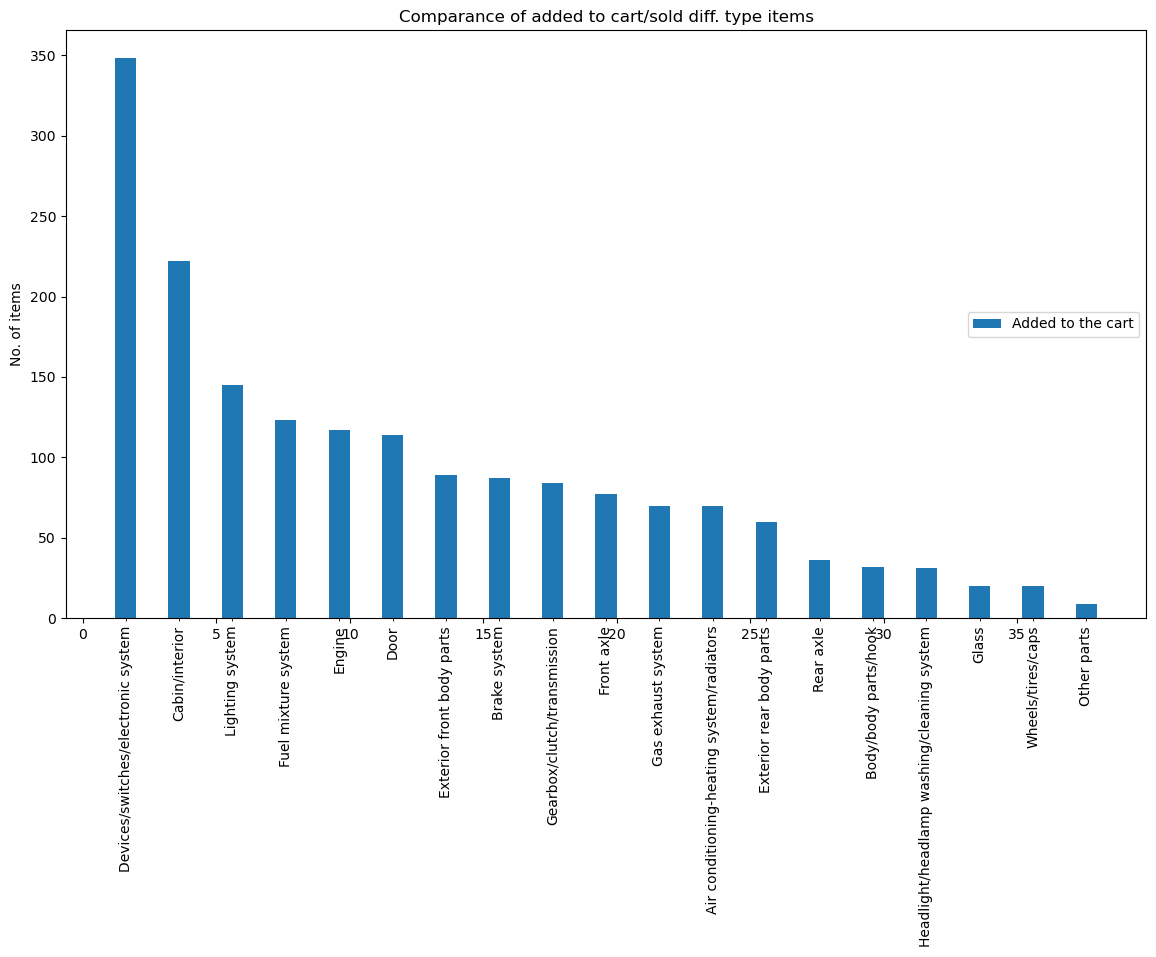

In [17]:
#categories_value_counts = categories_value_counts.reset_index()(drop=True)
#categories_value_counts.columns=['part_type', 'count']
#sold_item_counts_df = sold_item_counts_df.reset_index()
print(type(categories_value_counts))

#categories_value_counts = categories_value_counts.drop(['level_0', 'index'], axis=1)  <-- was required since I didn't include (drop=True) when converting series into a dataframe.
categories_value_counts.columns = ['part_type', 'count']

print(categories_value_counts)
print(sold_item_counts_df)

n = 1 # This is the first dataset (out of 2)
t = 2 # Number of datasets
d = 19 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]

n = 2 # This is the second dataset (out of 2)
t = 2 # Number of datasets
d = 19 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]

plt.figure(figsize=(12,10))

#ax = plt.subplot()
#plt.bar(x_values1, categories_value_counts['count'])
#ax.set_xticks(x_values1, minor=False)
#ax.set_xticklabels(categories_value_counts['part_type'], rotation=90, minor=False)
#ax.tick_params(labelsize=12)

ax = plt.subplot()
plt.bar(x_values2, sold_item_counts_df['count'])
ax.set_xticks(x_values2, minor=True)
ax.set_xticklabels(sold_item_counts_df['part_type'], rotation = 90, minor=True)
#ax.tick_params(labelsize=8)

plt.tight_layout(pad=3)  #makes xticklabels to fit into the saved picture.
plt.ylabel('No. of items')
plt.title('Comparance of added to cart/sold diff. type items')
plt.legend(['Added to the cart', 'Sold'], loc=7) #loc function makes legend on the right side in the middle.

import os #Makes the directory where to save the file, since used plt.savefig('Comparance of added to cart/sold diff. type items.png') didn't find the directory. 
file_path = '... sold diff. type items.png'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
plt.savefig(file_path)

#plt.savefig('Comparance of added to cart/sold diff. type items.png')
plt.show()




##### Splitting part_types into separate columns in new_df_sold and attaching part_prices to the unique marketplace_user_ids and their part_type items



In [ ]:
# Splitting part_types into separate columns on new_df_sold

# Split the 'part_types' column into separate columns
split_parts = new_df_sold['part_types'].apply(pd.Series)

# Rename columns to indicate part types
split_parts.columns = [f'part_type_{i+1}' for i in range(split_parts.shape[1])]

# Drop any existing conflicting columns in `new_df`
new_df_sold = new_df_sold.drop(columns=[col for col in new_df_sold.columns if col.startswith("part_type_")], errors='ignore')

# Concatenate the new columns to 'new_df'
new_df_sold = pd.concat([new_df_sold, split_parts], axis=1)

print(new_df_sold.head())
#assert new_df_sold.columns.is_unique, "Duplicate column names exist!"

             marketplace_events_user_id  \
0  16488e6c-265c-4d5f-a620-d93c56d72573   
1  168d117d-eb06-4d4a-8152-beb59bdf1b09   
2  16aeadd9-fad0-484b-a736-0b5e4899a4e5   
3  16deda24-44c2-4d3b-94db-47096d004f89   
4  16e4e4a0-ea63-4014-97ae-3e10a4378029   

                                          part_types  \
0          [Fuel mixture system, Gas exhaust system]   
1                      [Gearbox/clutch/transmission]   
2  [Fuel mixture system, Gearbox/clutch/transmiss...   
3                               [Gas exhaust system]   
4                                                 []   

                   part_type_1                  part_type_2 part_type_3  \
0          Fuel mixture system           Gas exhaust system         NaN   
1  Gearbox/clutch/transmission                          NaN         NaN   
2          Fuel mixture system  Gearbox/clutch/transmission      Engine   
3           Gas exhaust system                          NaN         NaN   
4                          Na

In [ ]:
#Preparing price_lookup_full table to attach prices to part_type items in new_df_sold:
price_lookup = df[['marketplace_events_user_id', 'part_type', 'part_price']].drop_duplicates()
price_lookup_full = price_lookup[price_lookup['part_price'].notna()]
print(price_lookup.head())

              marketplace_events_user_id part_type  part_price
0   a672268e-bac1-42c8-bd1c-069cbbaf3211       NaN         NaN
4   4f9ab9e0-4375-4221-b0b3-c03ad83249b5       NaN         NaN
5   1c272080-f3b3-48d4-bced-81837b810c45       NaN         NaN
47  a2ff7e6b-40ee-4c83-87a3-acbf20001833       NaN         NaN
48  9b57bb2c-fe63-4153-b4da-e3b76c74ff75       NaN         NaN


In [17]:
# Mapping prices for each part_type to new_df_sold

for col in split_parts.columns:
    # Map the prices using a merge operation
    new_df_sold = new_df_sold.merge(
        price_lookup,
        how='left',
        left_on=['marketplace_events_user_id', col],
        right_on=['marketplace_events_user_id', 'part_type'],
    )
    
    # Rename the new 'part_price' column to match the part type
    new_df_sold.rename(columns={'part_price': f'{col}_price'}, inplace=True)
    
    # Drop the unnecessary 'part_type' column from the merge
    new_df_sold.drop(columns=['part_type'], inplace=True)

    #Droping rows with generated NaN values 
    #new_df_sold = new_df_sold[new_df_sold ['part_type']]

In [ ]:
#print(new_df_sold['part_type_1'].head(10), new_df_sold['part_type_2'].head(10), new_df_sold['part_type_1_price'].head(10))

### Potential from ADDED and generated from SOLD Revenues

In [ ]:
checkout_success_users = df.loc[df['marketplace_events_page_type'] == 'Checkout success', 'marketplace_events_user_id']
relevant_df_rows_rev = df[df['marketplace_events_user_id'].isin(checkout_success_users)] # Getting the rows with all columns from df. where user id reached out "Checkout success".
                                                                                         # This is only the view from the original dataframe.
relevant_df_rows_rev = relevant_df_rows_rev.copy() # Making a separate dataframe from the original and working, modifying it later on a copy and not on the original data.
#print(relevant_df_rows.head())
relevant_df_rows_rev['part_price'] = relevant_df_rows_rev['part_price'].fillna(0) # Filling all the NaN values to the "part_price" column. 
grouped_part_price = relevant_df_rows_rev.groupby('marketplace_events_user_id')['part_price'].agg(list) # Gathering all prices to one place for each user_id which was grouped.
#print(grouped_part_price.head())
prices = grouped_part_price.reset_index() # Resseting - creating indexes - making a new dataframe to be working with.
print(prices[1541:1546])
new_df_prices = prices.fillna({'part_price': 0}) # This line is not necessary since I filled the NaN vlues with 0 above. Just forgot to delete it. 
print(new_df_prices)
# Revenue from sold items:
new_df_prices['part_price'] = new_df_prices['part_price'].apply(lambda x: sum(x) if isinstance(x, (list, np.ndarray)) else x) # Sums up all the values horizontlly 
                                                                                                                              # in lists which are on every column.
new_df_prices = new_df_prices.sort_values(by='part_price', ascending=False)
print(new_df_prices.head())
total_part_price = new_df_prices['part_price'].sum() #Sums up the whole column values vertically.
print("Generated Revenue in total: " + str(total_part_price))

# Potential revenue from added to the cart items - 2nd way to check:
df['part_price'] = df['part_price'].fillna(0)
total_added_to_cart_price = df['part_price'].sum()
print("Potential Revenue of all added to the cart items: " + str(total_added_to_cart_price))

                marketplace_events_user_id  \
1541  fe6c2f62-1462-4853-8f4b-420b68b4fb57   
1542  fec43dd6-581b-4d9e-b8e0-650dc53c8881   
1543  ff848bfb-d3f6-44d3-937c-7d4b1a430415   
1544  ffdf97c4-043e-4e5f-a113-3e3c3d68d477   
1545  fff9fd0b-fa6d-449c-916e-e1ebdd6a6ad9   

                                             part_price  
1541  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1542    [0.0, 0.0, 31.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
1543  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1544  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1545  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
                marketplace_events_user_id  \
0     16488e6c-265c-4d5f-a620-d93c56d72573   
1     168d117d-eb06-4d4a-8152-beb59bdf1b09   
2     16aeadd9-fad0-484b-a736-0b5e4899a4e5   
3     16deda24-44c2-4d3b-94db-47096d004f89   
4     16e4e4a0-ea63-4014-97ae-3e10a4378029   
...                                    ...   
1541  fe6c2f62-1462-4853-8f4b-420b68b4fb57   
1542  f

## ADDED TO THE CART Part_type items statistics

### ADDED part_type items statistics

In [96]:
#part_categories['part_price'] = pd.to_numeric(part_categories['part_price'])

#print(part_categories.head())
price_statistics_added_to_cart = (
    part_categories.groupby('part_type')['part_price']
    .agg( min_price='min', max_price='max', mean_price='mean')
    .reset_index())
print(price_statistics_added_to_cart)


                                     part_type  min_price  max_price  \
0    Air conditioning-heating system/radiators       5.00     900.00   
1                         Body/body parts/hook       5.17    1722.72   
2                                 Brake system       3.18     381.63   
3                               Cabin/interior       1.91    1647.05   
4           Devices/switches/electronic system       1.98    3000.00   
5                                         Door       2.99    1073.32   
6                                       Engine       4.00    7320.50   
7                    Exterior front body parts       4.12    3183.21   
8                     Exterior rear body parts       5.00     607.44   
9                                   Front axle       1.61    1122.35   
10                         Fuel mixture system       0.00    1992.00   
11                          Gas exhaust system       0.00     826.44   
12                 Gearbox/clutch/transmission       7.00    265

In [97]:
#price_statistics_sold = (
#    part_categories.groupby('part_type')['part_price']
#    .agg( min_price='min', max_price='max', mean_price='mean')
#    .reset_index())
#print(price_statistics_added_to_cart)


### Merging ADDED TO THE CART product type statistics with value counts

In [100]:
#categories_value_counts_df = categories_value_counts.reset_index()
categories_value_counts_df = categories_value_counts_df.drop(['index'], axis=1)
print(categories_value_counts_df.head())
categories_value_counts_df.columns = ['part_type', 'units_in_cart']
product_added_to_cart_statistics = price_statistics_added_to_cart.merge(
    categories_value_counts_df,  
    on='part_type',
    how='left' 
)
print(product_added_to_cart_statistics)

# Merge on the common column 'part_type'
# Use a left join to keep all product_statistics rows

                            part_type  count
0  Devices/switches/electronic system    685
1                      Cabin/interior    505
2                     Lighting system    301
3                                Door    274
4           Exterior front body parts    233
                                     part_type  min_price  max_price  \
0    Air conditioning-heating system/radiators       5.00     900.00   
1                         Body/body parts/hook       5.17    1722.72   
2                                 Brake system       3.18     381.63   
3                               Cabin/interior       1.91    1647.05   
4           Devices/switches/electronic system       1.98    3000.00   
5                                         Door       2.99    1073.32   
6                                       Engine       4.00    7320.50   
7                    Exterior front body parts       4.12    3183.21   
8                     Exterior rear body parts       5.00     607.44   
9         

### Adding potential revenue

In [27]:
product_added_to_cart_statistics ['Potential Revenue'] = product_added_to_cart_statistics ['units_in_cart'] * product_added_to_cart_statistics ['mean_price']
print(product_added_to_cart_statistics )
print("If all added products were sold brand.name would generate "+str(product_added_to_cart_statistics ['Potential Revenue'].sum()) 
      + " amount of some money :) (Guessing - Finland, so Euros) ")

                                     part_type  min_price  max_price  \
0    Air conditioning-heating system/radiators       5.00     900.00   
1                         Body/body parts/hook       5.17    1722.72   
2                                 Brake system       3.18     381.63   
3                               Cabin/interior       1.91    1647.05   
4           Devices/switches/electronic system       1.98    3000.00   
5                                         Door       2.99    1073.32   
6                                       Engine       4.00    7320.50   
7                    Exterior front body parts       4.12    3183.21   
8                     Exterior rear body parts       5.00     607.44   
9                                   Front axle       1.61    1122.35   
10                         Fuel mixture system       0.00    1992.00   
11                          Gas exhaust system       0.00     826.44   
12                 Gearbox/clutch/transmission       7.00    265